In [90]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [91]:
# Load the dataset
df = pd.read_csv('/content/smartphones_that_I_like.csv')

In [92]:
# Data Cleaning
df.dropna(subset=['avg_rating'], inplace=True)
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

In [93]:
# Data Cleaning - Handling Outliers with Z-score
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
z_scores = np.abs(zscore(df[numeric_cols]))
df_no_outliers = df[(z_scores < 3).all(axis=1)]

# Ensure avg_rating is not null after removing outliers
df_no_outliers = df_no_outliers.dropna(subset=['avg_rating'])

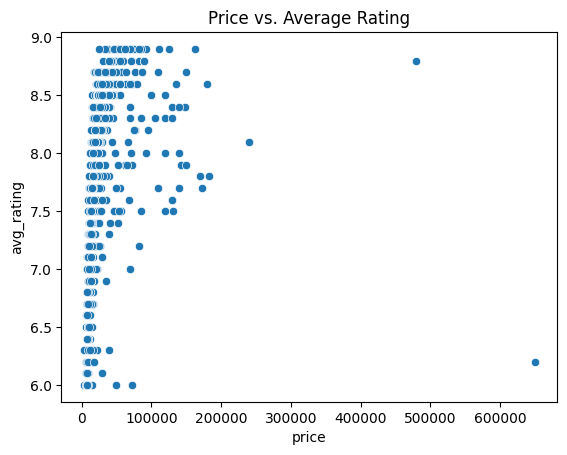

In [94]:
# Exploratory Data Analysis
sns.scatterplot(x='price', y='avg_rating', data=df)
plt.title('Price vs. Average Rating')
plt.show()

<ipython-input-95-78505bd1225d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


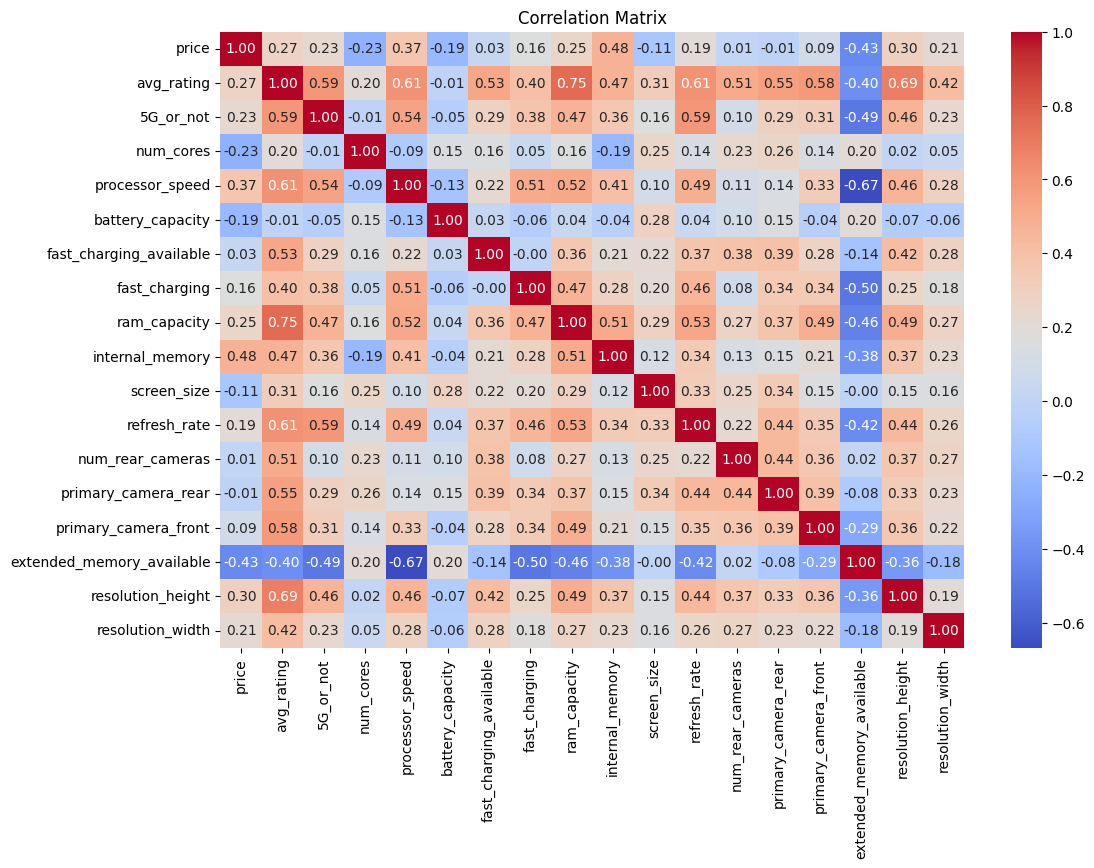

In [95]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

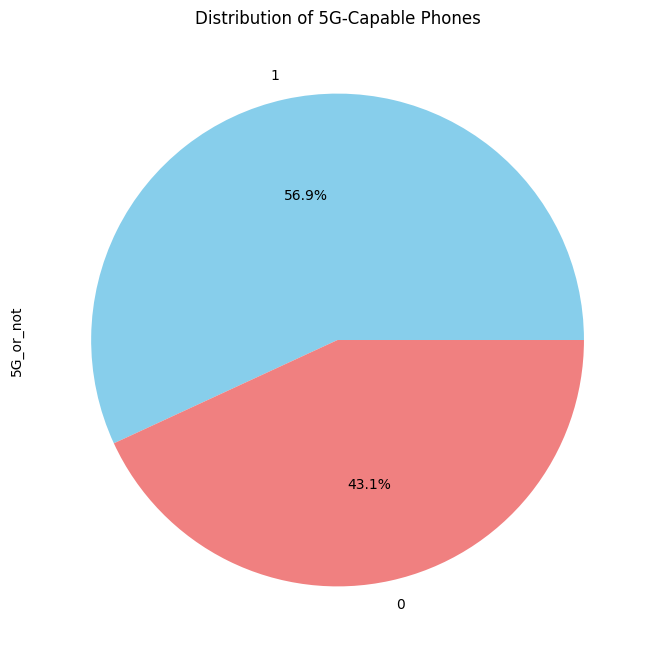

In [96]:
#Impact of 5G Technology
plt.figure(figsize=(8, 8))
df['5G_or_not'].value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Distribution of 5G-Capable Phones')
plt.show()

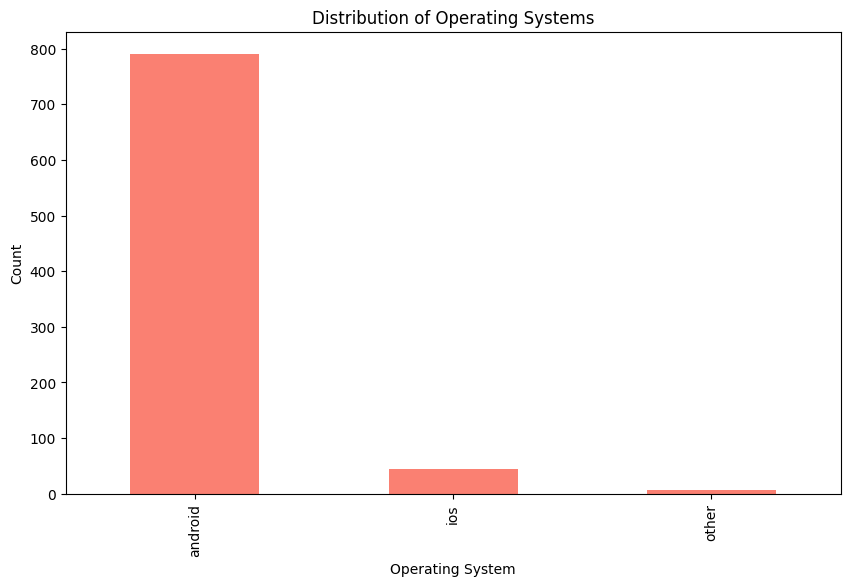

In [97]:
#Operating System Distribution
plt.figure(figsize=(10, 6))
df['os'].value_counts().plot(kind='bar', color='salmon')
plt.title('Distribution of Operating Systems')
plt.xlabel('Operating System')
plt.ylabel('Count')
plt.show()

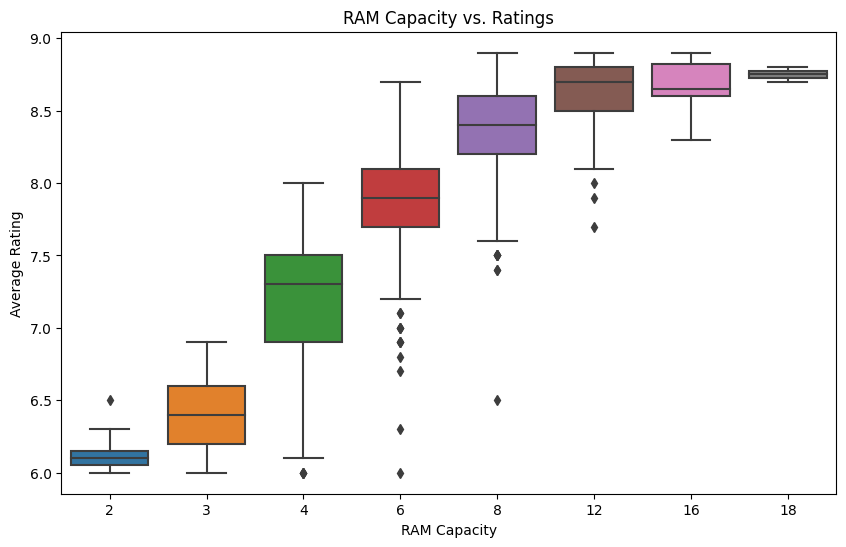

In [98]:
#RAM Capacity and Ratings
plt.figure(figsize=(10, 6))
sns.boxplot(x='ram_capacity', y='avg_rating', data=df)
plt.title('RAM Capacity vs. Ratings')
plt.xlabel('RAM Capacity')
plt.ylabel('Average Rating')
plt.show()

<ipython-input-99-07c9e8a04d8e>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='brand_name', y='avg_rating', data=df, ci=None)


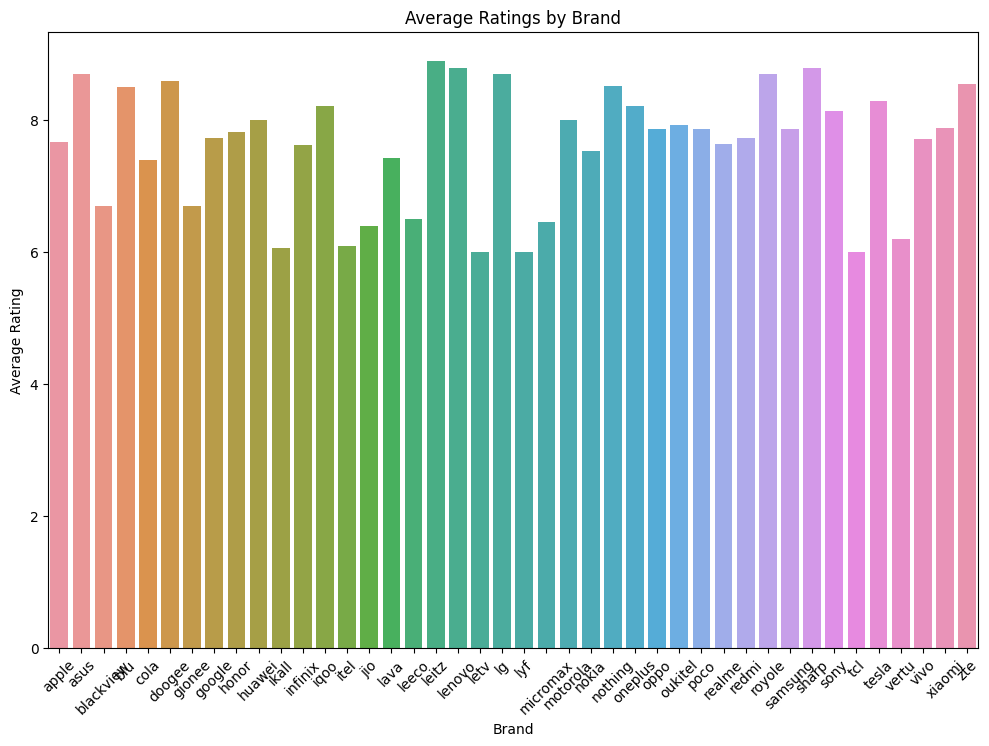

In [99]:
#Brand Preferences
plt.figure(figsize=(12, 8))
sns.barplot(x='brand_name', y='avg_rating', data=df, ci=None)
plt.title('Average Ratings by Brand')
plt.xlabel('Brand')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()


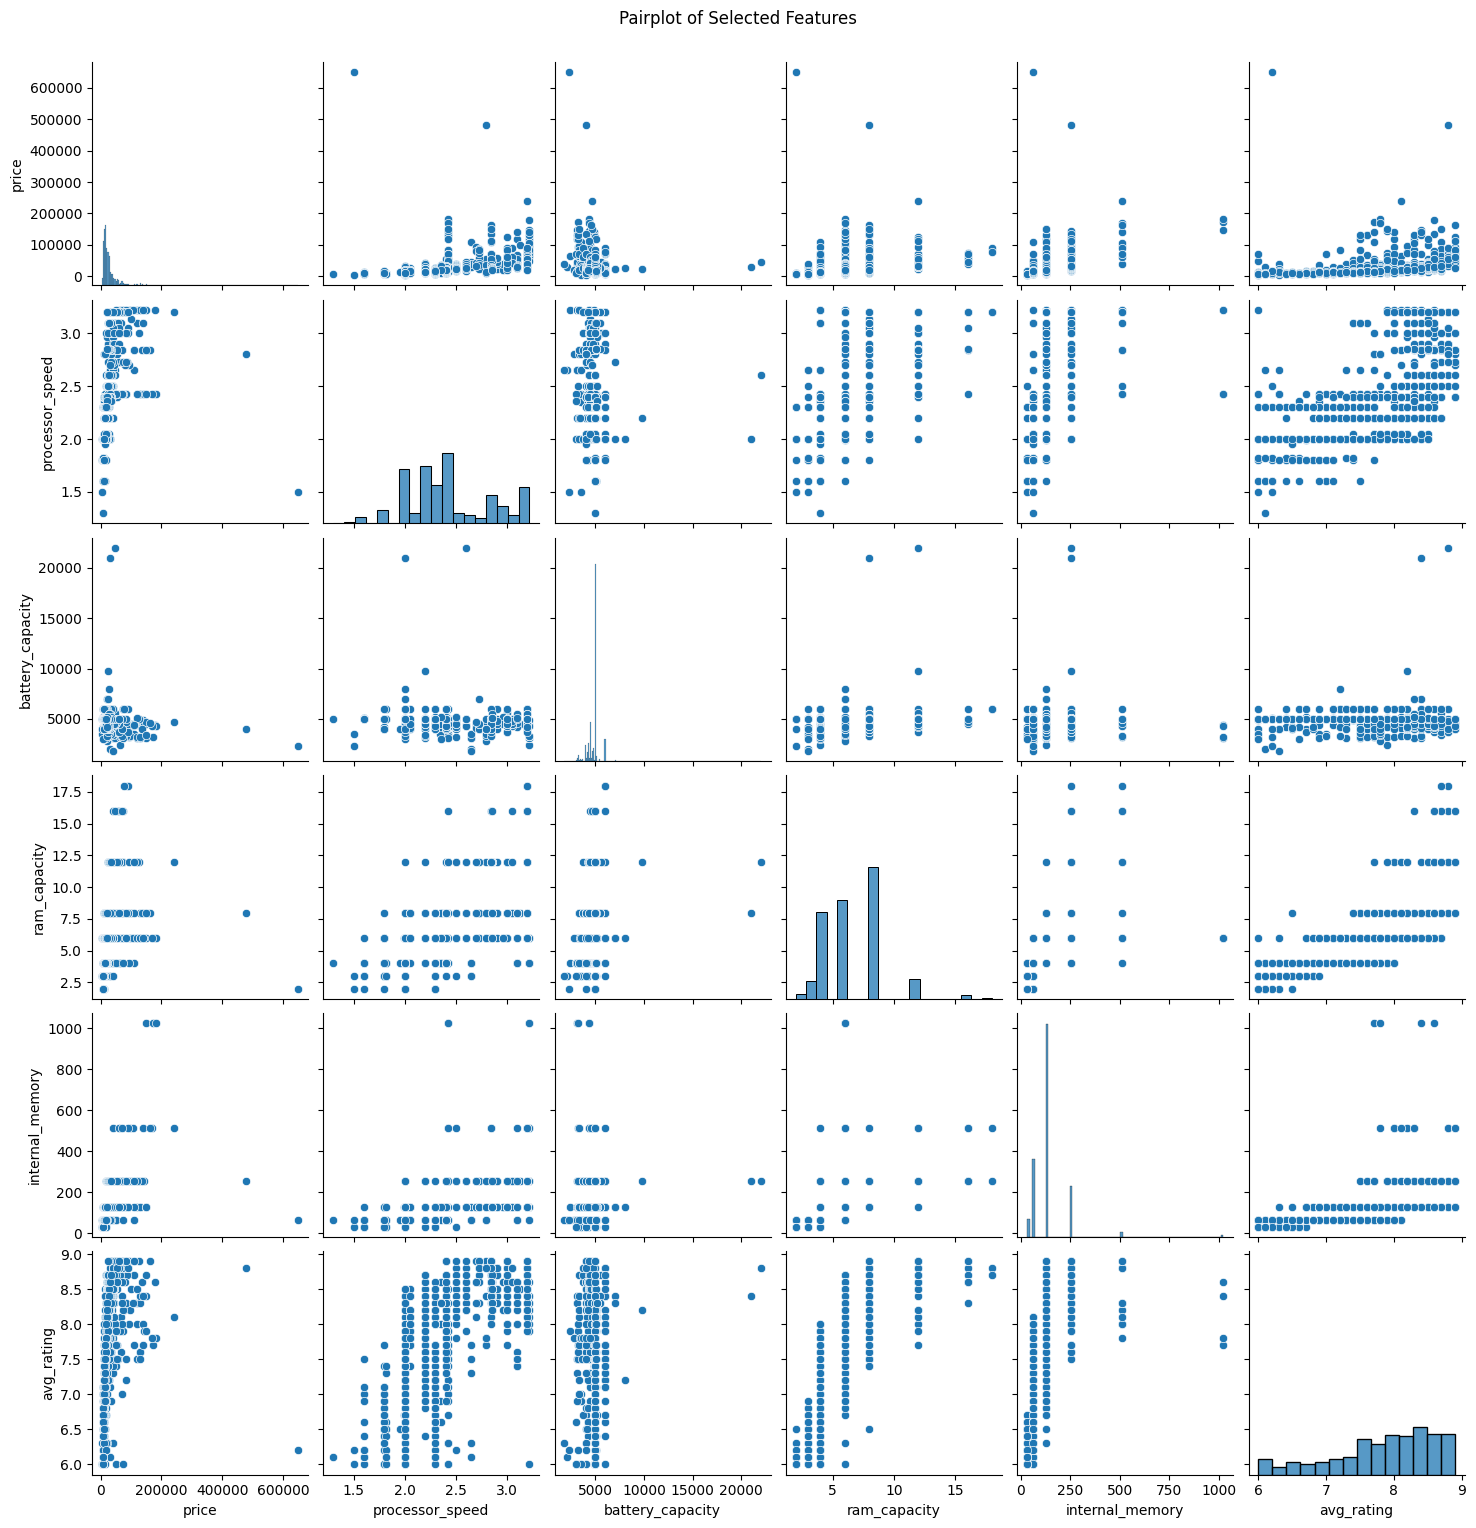

In [100]:
# Pairplot for selected features
selected_features = ['price', 'processor_speed', 'battery_capacity', 'ram_capacity', 'internal_memory', 'avg_rating']
sns.pairplot(df[selected_features])
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

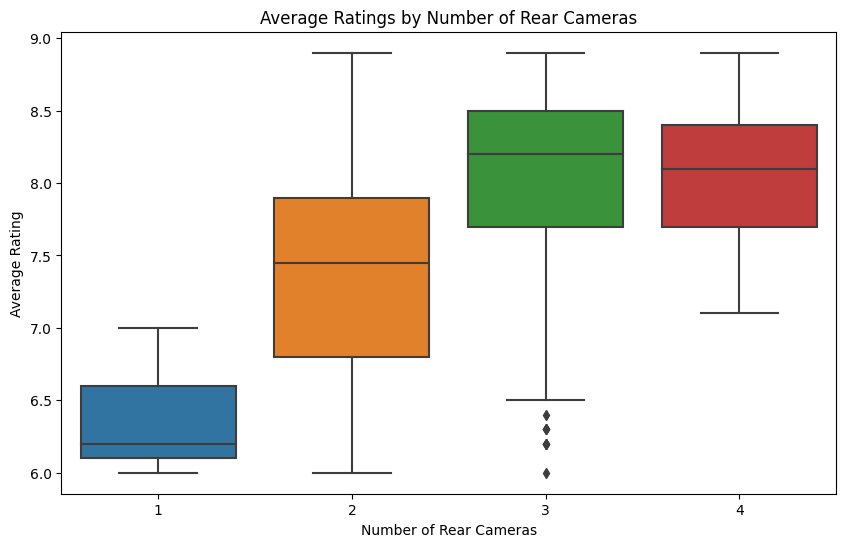

In [101]:
# Box plot of average ratings by the number of rear cameras
plt.figure(figsize=(10, 6))
sns.boxplot(x='num_rear_cameras', y='avg_rating', data=df)
plt.title('Average Ratings by Number of Rear Cameras')
plt.xlabel('Number of Rear Cameras')
plt.ylabel('Average Rating')
plt.show()


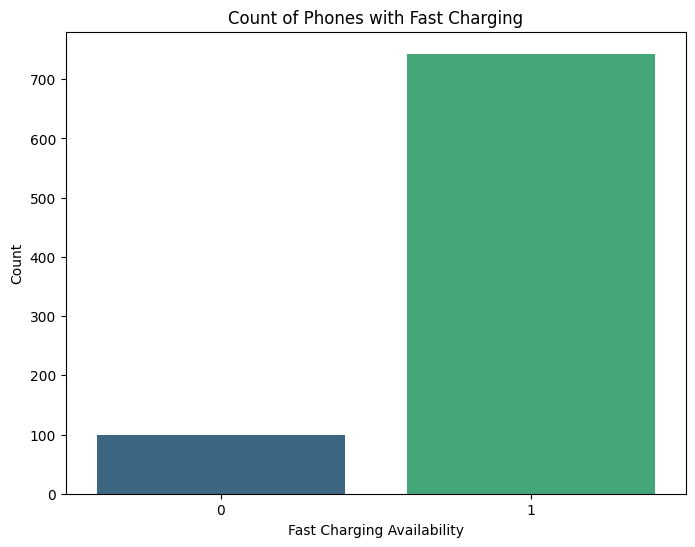

In [102]:
# Countplot of fast-charging availability
plt.figure(figsize=(8, 6))
sns.countplot(x='fast_charging_available', data=df, palette='viridis')
plt.title('Count of Phones with Fast Charging')
plt.xlabel('Fast Charging Availability')
plt.ylabel('Count')
plt.show()


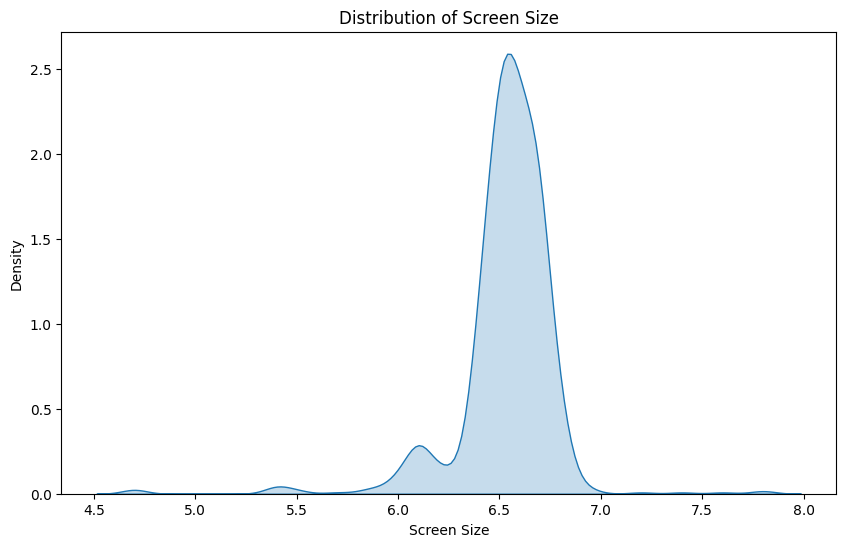

In [103]:
# Distribution of screen size
plt.figure(figsize=(10, 6))
sns.kdeplot(df['screen_size'], fill=True)
plt.title('Distribution of Screen Size')
plt.xlabel('Screen Size')
plt.show()


In [104]:
# Model Training and Evaluation
X_no_outliers = df_no_outliers.drop(['avg_rating'], axis=1)
y_no_outliers = df_no_outliers['avg_rating']
X_train_no_outliers, X_test_no_outliers, y_train_no_outliers, y_test_no_outliers = train_test_split(
    X_no_outliers, y_no_outliers, test_size=0.2, random_state=42
)

preprocessor_no_outliers = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X_train_no_outliers.select_dtypes(exclude=['object']).columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'SVR': SVR(),
    'KNN': KNeighborsRegressor(),
}

results_no_outliers = {}

for name, model in models.items():
    pipeline = make_pipeline(preprocessor_no_outliers, SimpleImputer(strategy='mean'), model)
    cv_scores = cross_val_score(pipeline, X_no_outliers, y_no_outliers, cv=5, scoring='neg_mean_squared_error')
    cv_scores = -cv_scores
    results_no_outliers[name] = {'Cross-Validation Mean Squared Error': np.mean(cv_scores)}

for name, result in results_no_outliers.items():
    print(f'{name}:')
    print(f'Cross-Validation Mean Squared Error: {result["Cross-Validation Mean Squared Error"]}')
    print('---')

best_algorithm_no_outliers = min(results_no_outliers, key=lambda x: results_no_outliers[x]['Cross-Validation Mean Squared Error'])
best_model_no_outliers = models[best_algorithm_no_outliers]
print(f'The best-performing algorithm is: {best_algorithm_no_outliers}')

Linear Regression:
Cross-Validation Mean Squared Error: 0.05611040956121473
---
Decision Tree:
Cross-Validation Mean Squared Error: 0.08177061803444788
---
Random Forest:
Cross-Validation Mean Squared Error: 0.05112149231003027
---
Gradient Boosting:
Cross-Validation Mean Squared Error: 0.05464817503854826
---
SVR:
Cross-Validation Mean Squared Error: 0.06407704055316617
---
KNN:
Cross-Validation Mean Squared Error: 0.083926569402229
---
The best-performing algorithm is: Random Forest


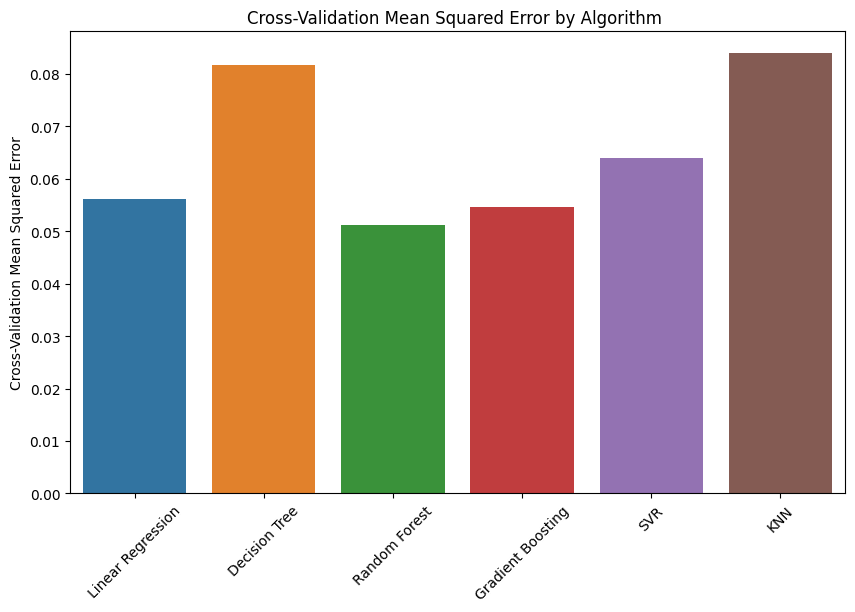

In [109]:
# Visualize Cross-Validation Results
cv_results_df_no_outliers = pd.DataFrame(results_no_outliers).T
plt.figure(figsize=(10, 6))
sns.barplot(x=cv_results_df_no_outliers.index, y=cv_results_df_no_outliers['Cross-Validation Mean Squared Error'])
plt.title('Cross-Validation Mean Squared Error by Algorithm ')
plt.xticks(rotation=45)
plt.show()

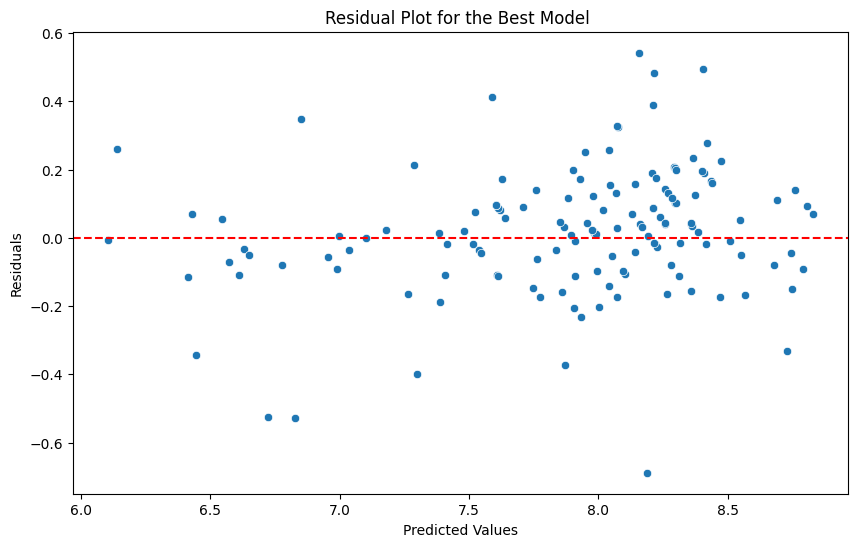

In [110]:
# Residual Plot for the Best Model (No Outliers)
pipeline_best_no_outliers = make_pipeline(preprocessor_no_outliers, SimpleImputer(strategy='mean'), best_model_no_outliers)
pipeline_best_no_outliers.fit(X_train_no_outliers, y_train_no_outliers)
predictions_best_no_outliers = pipeline_best_no_outliers.predict(X_test_no_outliers)

residuals_no_outliers = y_test_no_outliers - predictions_best_no_outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(x=predictions_best_no_outliers, y=residuals_no_outliers)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot for the Best Model ')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

<ipython-input-111-7a57d800df15>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(predictions_best_no_outliers, label='Predicted Values', shade=True)
<ipython-input-111-7a57d800df15>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_test_no_outliers, label='Actual Values', shade=True)


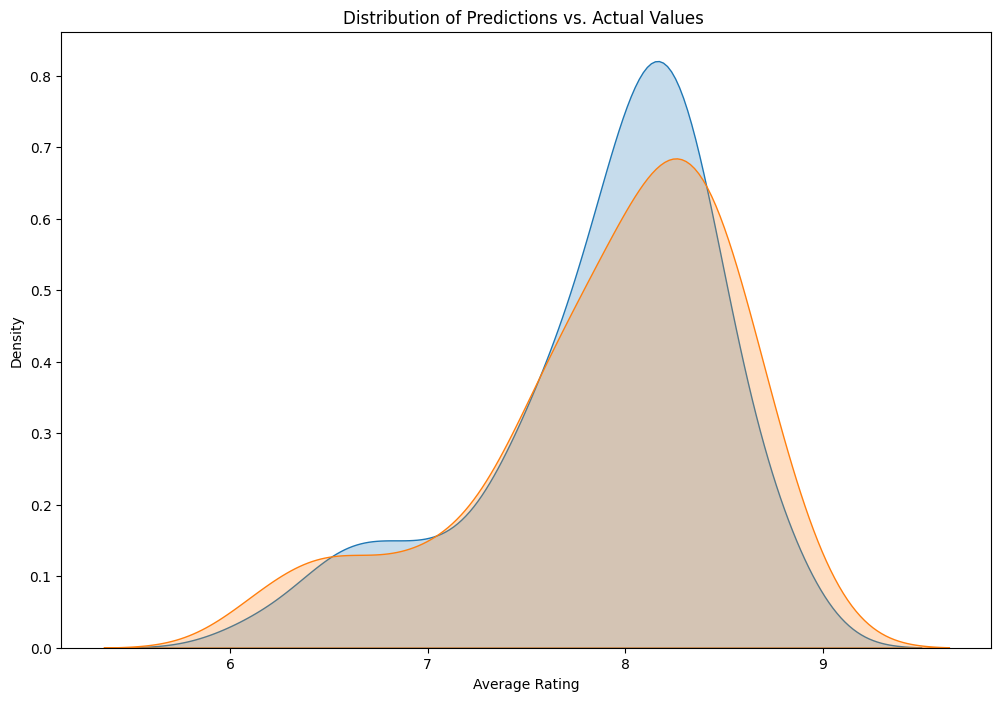

In [111]:
# Distribution of Predictions vs. Actual Values (No Outliers)
plt.figure(figsize=(12, 8))
sns.kdeplot(predictions_best_no_outliers, label='Predicted Values', shade=True)
sns.kdeplot(y_test_no_outliers, label='Actual Values', shade=True)
plt.title('Distribution of Predictions vs. Actual Values ')
plt.xlabel('Average Rating')
plt.show()

Evaluation Metrics for the Best Model 
Mean Squared Error: 0.03278980851063815
R-squared: 0.9250403395579885


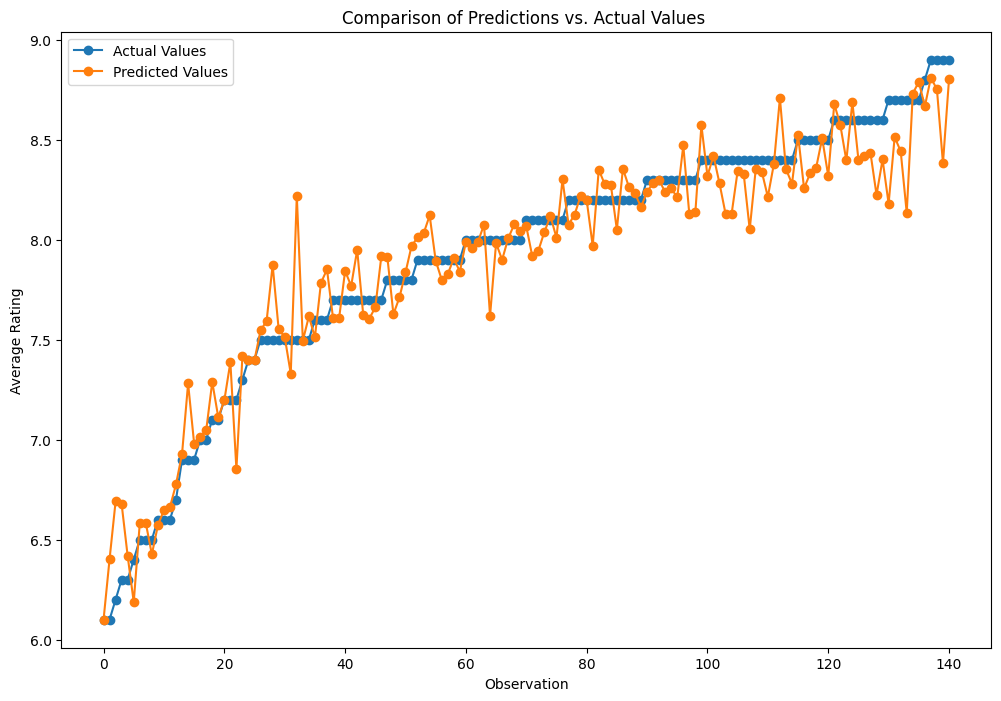

In [112]:
# Model Evaluation Metrics (No Outliers)
pipeline_best_no_outliers.fit(X_train_no_outliers, y_train_no_outliers)
predictions_best_no_outliers = pipeline_best_no_outliers.predict(X_test_no_outliers)

# Evaluate the model (No Outliers)
mse_best_no_outliers = mean_squared_error(y_test_no_outliers, predictions_best_no_outliers)
r2_best_no_outliers = r2_score(y_test_no_outliers, predictions_best_no_outliers)

print(f'Evaluation Metrics for the Best Model ')
print(f'Mean Squared Error: {mse_best_no_outliers}')
print(f'R-squared: {r2_best_no_outliers}')

# Compare Predictions vs. Actual Values (No Outliers)
compare_df_no_outliers = pd.DataFrame({'Actual Values': y_test_no_outliers, 'Predicted Values': predictions_best_no_outliers})
compare_df_no_outliers = compare_df_no_outliers.sort_values(by='Actual Values').reset_index(drop=True)

plt.figure(figsize=(12, 8))
plt.plot(compare_df_no_outliers['Actual Values'], label='Actual Values', marker='o')
plt.plot(compare_df_no_outliers['Predicted Values'], label='Predicted Values', marker='o')
plt.title('Comparison of Predictions vs. Actual Values ')
plt.xlabel('Observation')
plt.ylabel('Average Rating')
plt.legend()
plt.show()